In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/healthcare-dataset-2019-2024/healthcare_dataset.csv')

In [2]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
df = df.drop('Name',axis=1)
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 55500 non-null  int64         
 1   Gender              55500 non-null  object        
 2   Blood Type          55500 non-null  object        
 3   Medical Condition   55500 non-null  object        
 4   Date of Admission   55500 non-null  datetime64[ns]
 5   Doctor              55500 non-null  object        
 6   Hospital            55500 non-null  object        
 7   Insurance Provider  55500 non-null  object        
 8   Billing Amount      55500 non-null  float64       
 9   Room Number         55500 non-null  int64         
 10  Admission Type      55500 non-null  object        
 11  Discharge Date      55500 non-null  datetime64[ns]
 12  Medication          55500 non-null  object        
 13  Test Results        55500 non-null  object    

In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Age,55500.0,51.539459,13.0,35.0,52.0,68.0,89.0,19.602454
Date of Admission,55500,2021-11-01 01:02:22.443243008,2019-05-08 00:00:00,2020-07-28 00:00:00,2021-11-01 00:00:00,2023-02-03 00:00:00,2024-05-07 00:00:00,NaN
Billing Amount,55500.0,25539.316097,-2008.49214,13241.224652,25538.069376,37820.508436,52764.276736,14211.454431
Room Number,55500.0,301.134829,101.0,202.0,302.0,401.0,500.0,115.243069
Discharge Date,55500,2021-11-16 13:15:20.821621504,2019-05-09 00:00:00,2020-08-12 00:00:00,2021-11-17 00:00:00,2023-02-18 00:00:00,2024-06-06 00:00:00,NaN


# Basic countplots

Gender
Male      27774
Female    27726
Name: count, dtype: int64


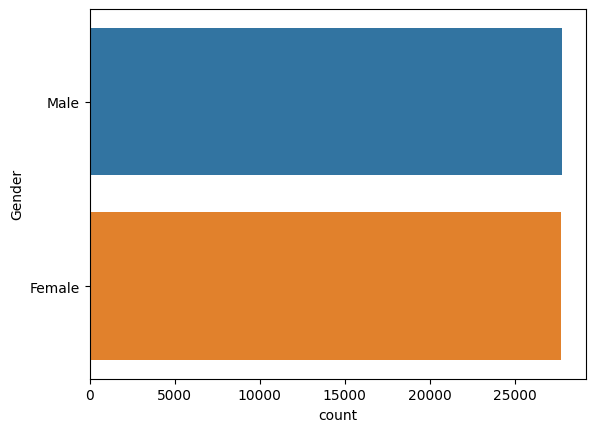

-----------------------------------
Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64


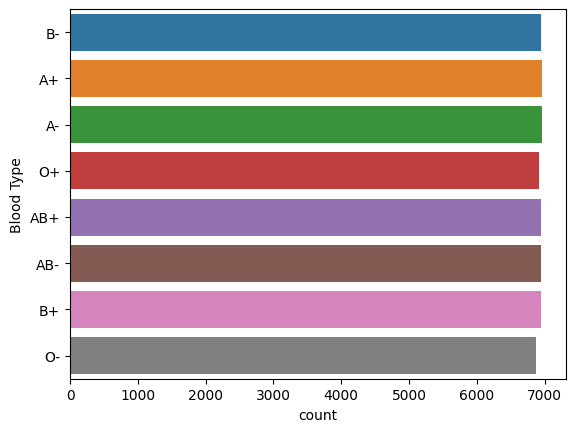

-----------------------------------
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64


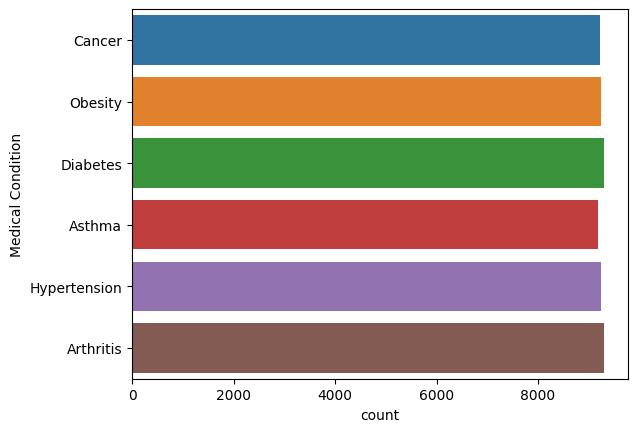

-----------------------------------
Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64


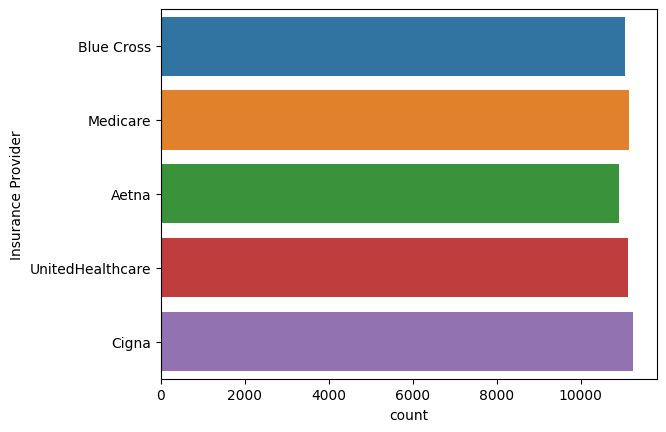

-----------------------------------
Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


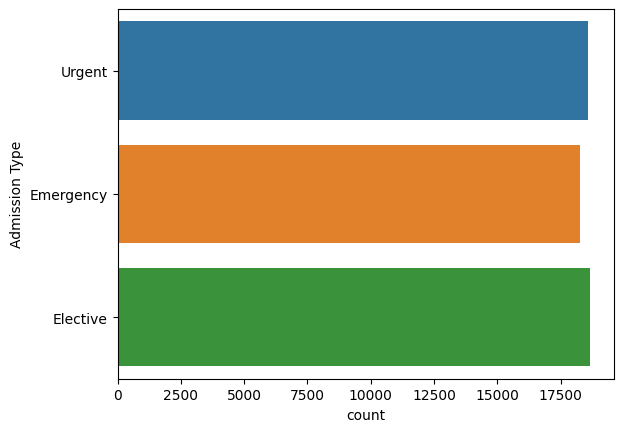

-----------------------------------
Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64


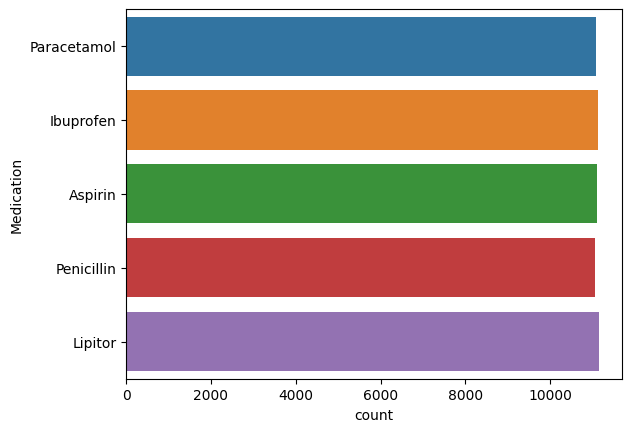

-----------------------------------
Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


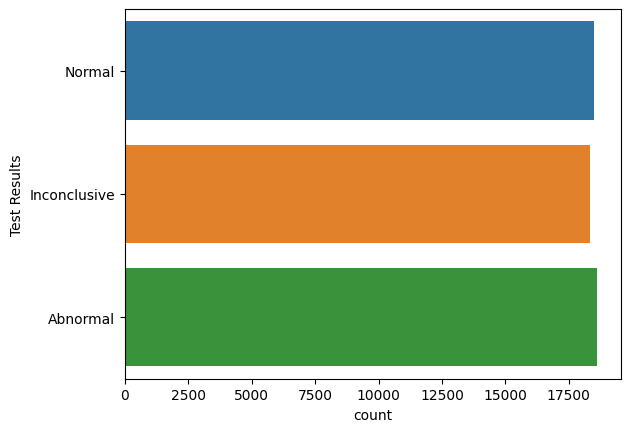

-----------------------------------


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df:
    if col == 'Doctor' or col =='Hospital':
        pass
    elif df[col].dtype == 'O':
        print(df[col].value_counts())
        sns.countplot(y=col,data=df)
        plt.show()
        print('-----------------------------------')
    

# Medical condition and admission type

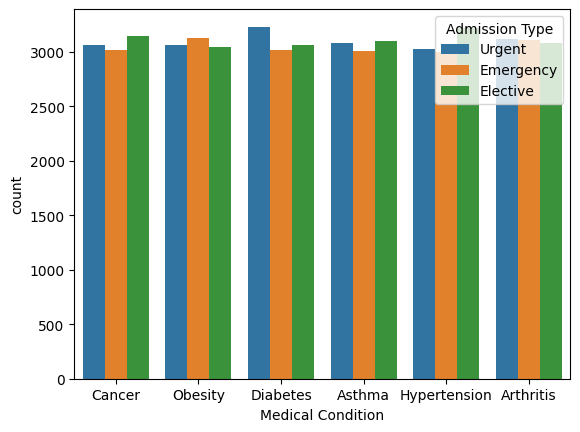

In [8]:
sns.countplot(x='Medical Condition', hue='Admission Type', data=df)
plt.show()

# Billing amount range for each medical condition

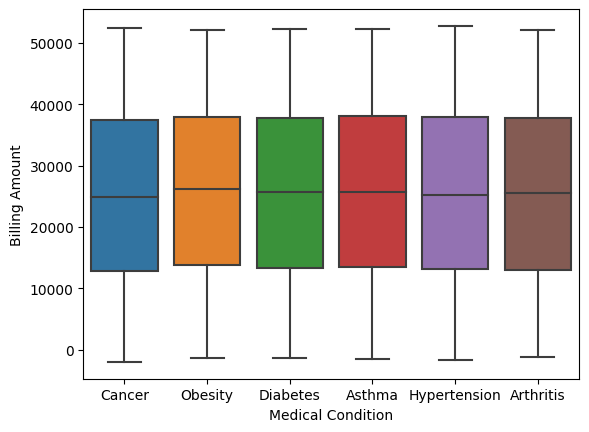

In [9]:
sns.boxplot(x='Medical Condition', y='Billing Amount', data=df)
plt.show()

# Medications count for each medical condition

In [10]:
df['Medication'].unique()

array(['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor'],
      dtype=object)

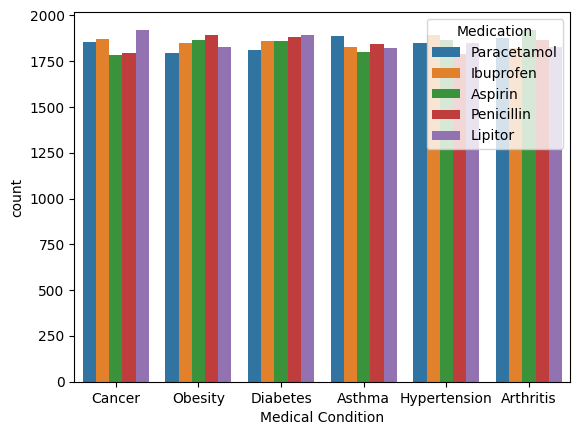

In [11]:
sns.countplot(x='Medical Condition', hue='Medication', data=df)
plt.show()

# Stacked bar plot for Gender vs. Medical Condition

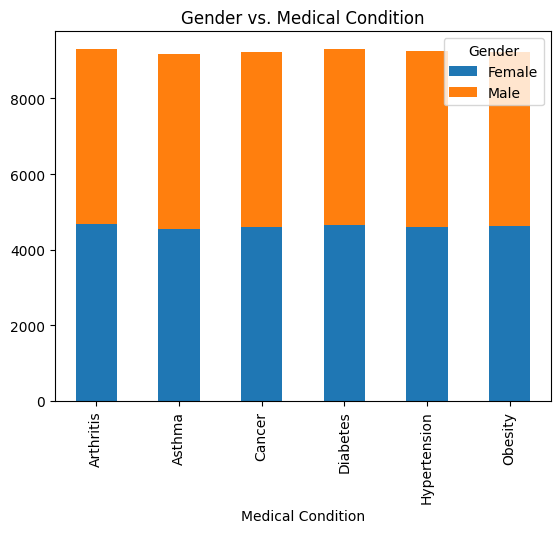

In [12]:
df.groupby(['Medical Condition', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Gender vs. Medical Condition')
plt.show()

# Scatterplot for test results with medical conditions and bills

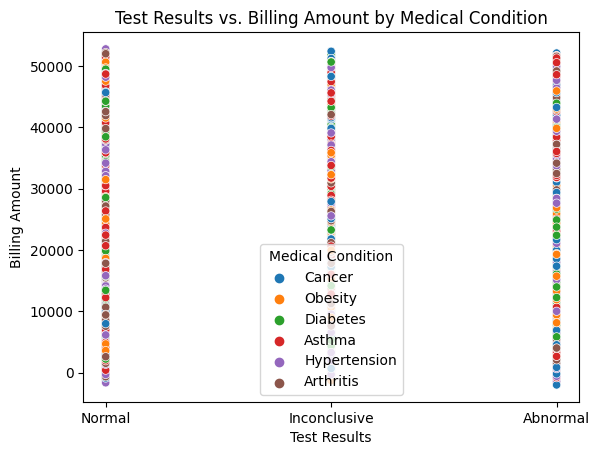

In [13]:
sns.scatterplot(x='Test Results', y='Billing Amount', hue='Medical Condition', data=df)
plt.title('Test Results vs. Billing Amount by Medical Condition')
plt.show()

# Gender vs Age

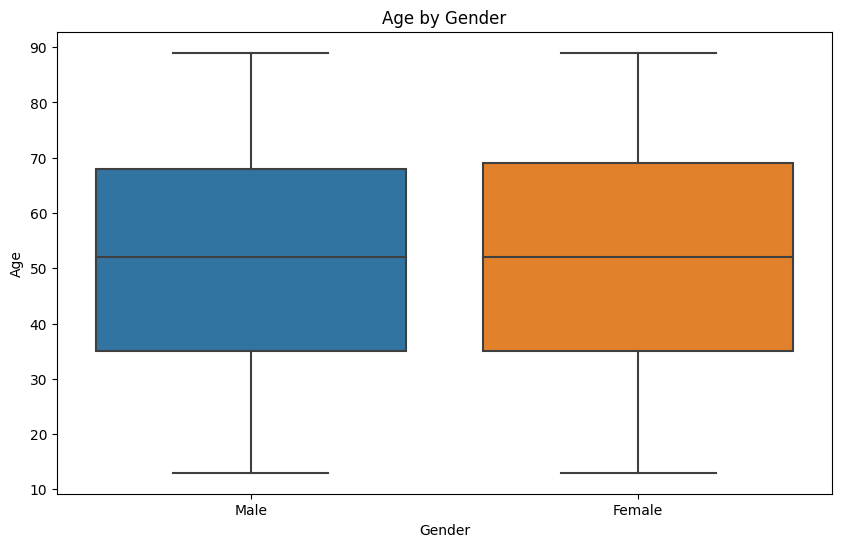

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title('Age by Gender')
plt.show()

# Pairplot between Medical condition and [age, billing amount]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

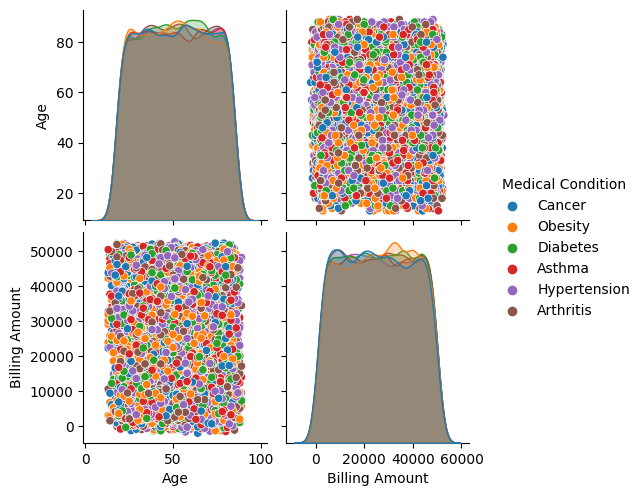

In [15]:
sns.pairplot(df, hue='Medical Condition', vars=['Age', 'Billing Amount'])
plt.show()

# How long does patient stays

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


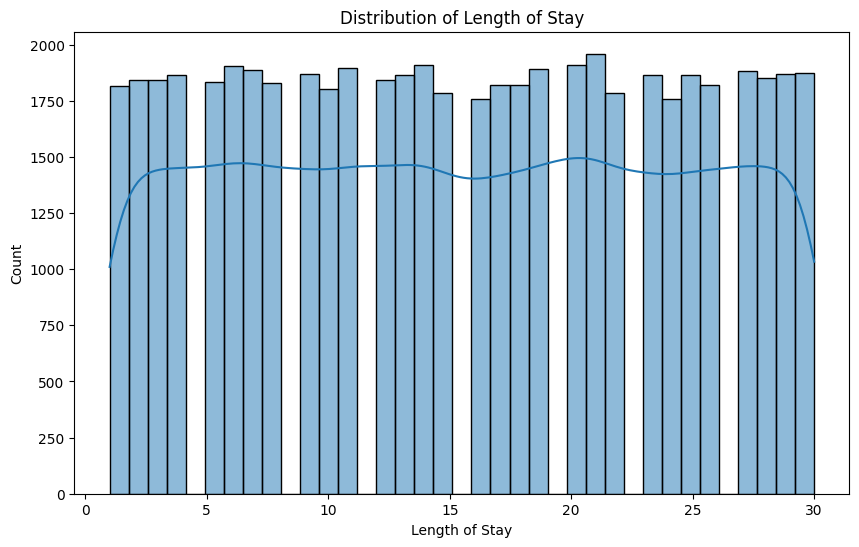

In [16]:
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(df['Length of Stay'], kde=True)
plt.title('Distribution of Length of Stay')
plt.show()

# Billing Amount, Age, Length stay

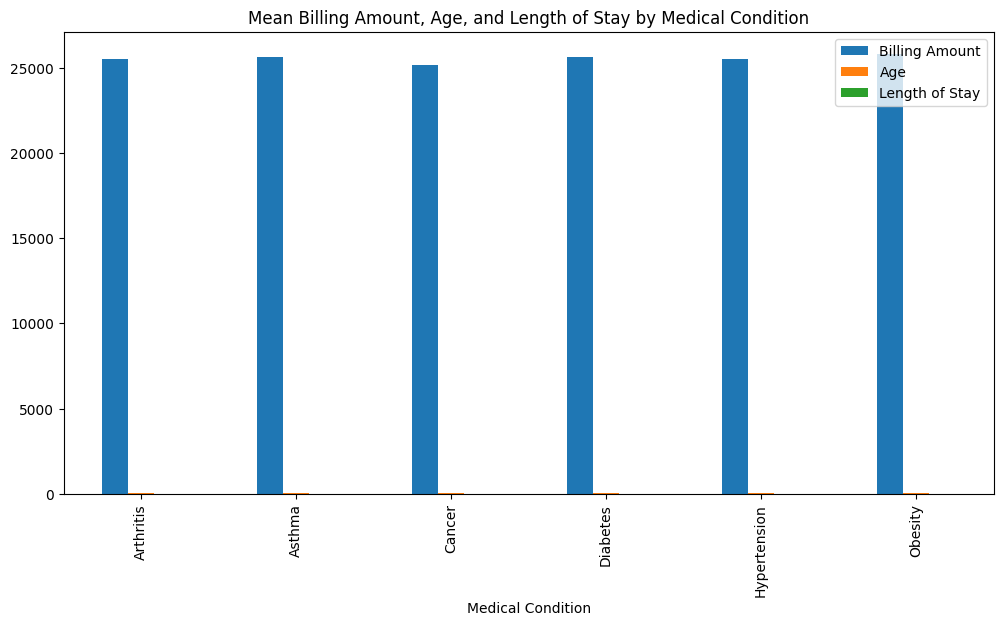

In [17]:
grouped = df.groupby('Medical Condition').agg({'Billing Amount': 'mean', 'Age': 'mean', 'Length of Stay': 'mean'})
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Billing Amount, Age, and Length of Stay by Medical Condition')
plt.show()